# Adult Census Income

Estos datos fueron extraídos de la base de datos de la oficina del censo de 1994 por Ronny Kohavi y Barry Becker (Data Mining and Visualization, Silicon Graphics). La tarea de predicción es determinar si una persona gana más de $ 50K al año.

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Información de los atributos

Los pesos en los archivos de la Encuesta de Población Actual (CPS) se controlan a estimaciones independientes de la población civil no institucional de los Estados Unidos. Utilizamos 3 conjuntos de controles. Estos son:
**a)** Una estimación de una sola célula de la población 16+ para cada estado.
**b)** Una estimación de una sola célula de la población 16+ para cada estado.
**c)** Controles por raza, edad y sexo.

Usamos los tres conjuntos de controles en nuestro programa de ponderación y los "rastrillamos" 6 veces para que al final volvamos a todos los controles que usamos. El término **estimación** se refiere a los totales de población derivados de CPS mediante la creación de "recuentos ponderados" de cualquier característica socioeconómica específica de la población.

+ **age:** edad
+ **workclass:** clase de trabajo
+ **fnlwgt:** peso final, el número de personas que representa la entrada del censo
+ **education:** nivel educativo
+ **education-num:** número de años de educación completados
+ **marital-status:** estado civil
+ **occupation:** ocupación
+ **relationship:** relación en la familia
+ **race:** raza
+ **sex:** género
+ **capital-gain:** ganancia de capital
+ **capital-loss:** pérdida de capital
+ **hours-per-week:** horas trabajadas por semana
+ **native-country:** país de origen
+ **Income:** Ingreso

## Carga de datos

In [2]:
census = pd.read_csv('/work/adult.csv')

In [3]:
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Analizando variable Income

In [6]:
census['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [7]:
census['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

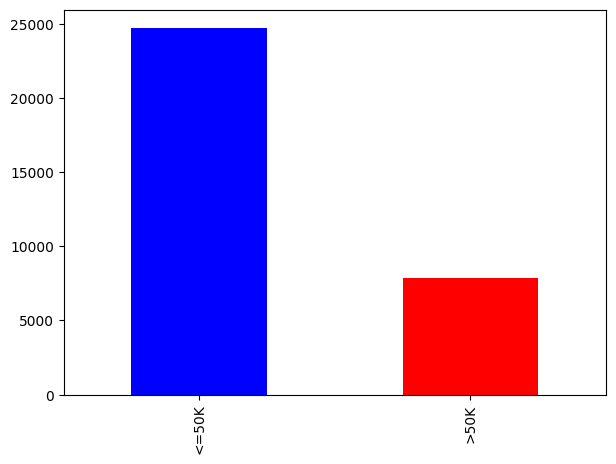

In [8]:
plt.subplots(figsize=(7,5))
census['income'].value_counts().plot.bar(color = ['b','r'])
plt.show()

Cerca de 25000 registros ganan menos de 50 mil dólares y menos de 8000 ganan mas de 50 mil dólares.

## Convertir variables object en variables numérica

In [9]:
census['income'].replace({'<=50K': 1,'>50K':0},inplace=True)
census.head() 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,1
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,1


In [10]:
census['sex'].replace({'Female': 1,'Male':0},inplace=True)
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,1
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,1


In [11]:
census['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [12]:
census['race'].replace({'White': 0,'Black':1,'Asian-Pac-Islander':2,'Other':3,'Amer-Indian-Eskimo':4},inplace=True)
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,0,1,0,4356,40,United-States,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,1,0,4356,18,United-States,1
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,1,1,0,4356,40,United-States,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,1,0,3900,40,United-States,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,1,0,3900,40,United-States,1


## Eliminar variables categóricas

In [13]:
cols = ['workclass','education','marital.status','occupation','relationship','native.country']
census = census.drop(cols, axis= 1)
census.shape

(32561, 9)

In [14]:
census.head()

,age,fnlwgt,education.num,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,1,0,4356,40,1
1,82,132870,9,0,1,0,4356,18,1
2,66,186061,10,1,1,0,4356,40,1
3,54,140359,4,0,1,0,3900,40,1
4,41,264663,10,0,1,0,3900,40,1


## Análisis de Correlación

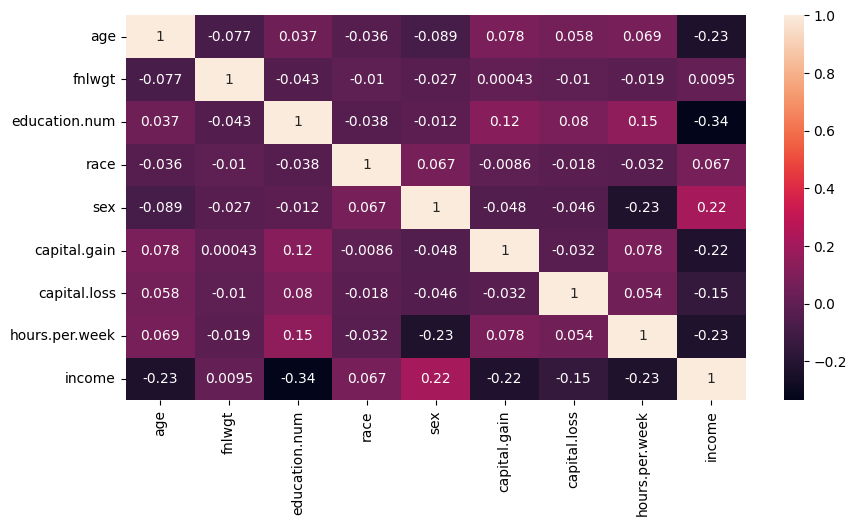

In [15]:
plt.subplots(figsize=(10,5)) 
df_corr = census.corr()
sns.heatmap(df_corr,cbar=True,annot=True)
plt.show()

No existe correlación lineal entre las variables. Procederemos a realizar un modelo de Random Forest, ya que es robusto frente a la multicolinealidad.  El algoritmo de Random Forest construye una colección de árboles no correlacionados y luego los promedia.

## Entrenamiento de Random Forest

In [16]:
X = census.drop(['income'],axis =1)
y = census['income']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [18]:
rf = RandomForestClassifier(n_estimators= 10, random_state=42)

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [20]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

## Evaluación del modelo

In [86]:
train_accuracy = round(accuracy_score(y_train, y_train_pred),2)*100
test_accuracy = round(accuracy_score(y_test, y_test_pred),2)*100

print('El accuracy en train es: ',train_accuracy,'%')
print('El accuracy en test es: ',test_accuracy,'%')

El accuracy en train es:  99.0 %
El accuracy en test es:  81.0 %


Un accuracy de entrenamiento alto (99%) y un accuracy de prueba bajo (81%) sugieren que el modelo está sobreajustando los datos de entrenamiento. El modelo está aprendiendo demasiado bien los datos de entrenamiento y no generaliza bien a los datos nuevos. 

In [23]:
feature_importance_df = pd.DataFrame(
    {'feature':list(X.columns),'importance':rf.feature_importances_}
).sort_values('importance',ascending=False)
feature_importance_df

,feature,importance
1,fnlwgt,0.331521
0,age,0.208334
2,education.num,0.135873
5,capital.gain,0.126296
7,hours.per.week,0.104520
6,capital.loss,0.045354
4,sex,0.035192
3,race,0.012909


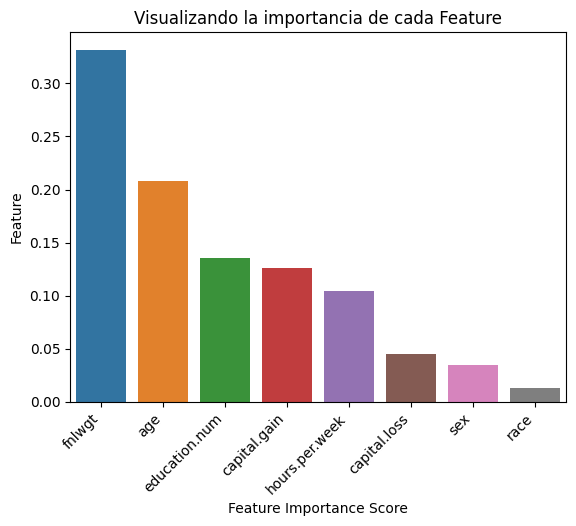

In [26]:
sns.barplot(x=feature_importance_df.feature,y=feature_importance_df.importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Visualizando la importancia de cada Feature')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.show()

## Reentrenamiento y Evaluación

Se procederá a retirar las variables que tiene menos incidencias (capital.loss, sex, race).

In [31]:
X.head()

,age,fnlwgt,education.num,race,sex,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,1,0,4356,40
1,82,132870,9,0,1,0,4356,18
2,66,186061,10,1,1,0,4356,40
3,54,140359,4,0,1,0,3900,40
4,41,264663,10,0,1,0,3900,40


In [50]:
cols_2= ['capital.loss','sex','race','income']
X = census.drop(cols_2,axis =1)
X.shape

(32561, 5)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [46]:
rf_1 = RandomForestClassifier(n_estimators= 10, random_state=42)

In [47]:
rf_1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [58]:
y_train_pred_1 = rf_1.predict(X_train)
y_test_pred_1 = rf_1.predict(X_test)

In [85]:
train_accuracy_1 = round(accuracy_score(y_train,y_train_pred_1),2)*100
test_accuracy_1 = round(accuracy_score(y_test,y_test_pred_1),2)*100

print('El accuracy en train es', train_accuracy_1,'%')
print('El accuracy en test es', test_accuracy_1,'%')

El accuracy en train es 98.0 %
El accuracy en test es 79.0 %


Al retirar las 3 features que menos incidencia tenia en el primer modelo, nos encontramos con que se sigue manteniendo una diferencia importante entre el accuracy del train y el accuracy del test

## Reentrenamiento y Evaluación del nuevo modelo

In [77]:
rf_2 = RandomForestClassifier(n_estimators= 10 , max_depth=10)

In [78]:
rf_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10)

In [79]:
y_train_pred_2 = rf_2.predict(X_train)
y_test_pred_2 = rf_2.predict(X_test)

In [84]:
train_accuracy_2 = round(accuracy_score(y_train,y_train_pred_2),2)*100
test_accuracy_2 = round(accuracy_score(y_test,y_test_pred_2),2)*100

print('El accuracy en train es', train_accuracy_2,'%')
print('El accuracy en test es', test_accuracy_2,'%')

El accuracy en train es 84.0 %
El accuracy en test es 83.0 %


Al incorporar max_depth, que es la profundidad de un árbol, se logró mejorar la diferencia que había entre los accuracy (medida que demuestra que tan bien se desempeña el modelo).

In [81]:
print(classification_report(y_test, y_test_pred_2))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55      2340
           1       0.84      0.95      0.89      7429

    accuracy                           0.83      9769
   macro avg       0.79      0.69      0.72      9769
weighted avg       0.82      0.83      0.81      9769



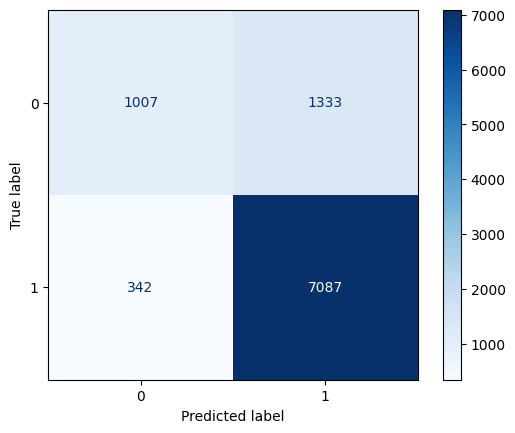

In [99]:
cm = confusion_matrix(y_test,y_test_pred_2, labels=rf_2.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_2.classes_)
disp.plot(cmap='Blues')
plt.show()

Esta matriz de confusión indica que para 1007 casos ganan mas de 50k dólares y lo predijo correctamente y en 7087 casos ganan menos o igual a 50k dólares y lo predijo correctamente. También predijo que en 1333 casos que ganaban más de 50k dólares y los predijo erróneamente, asimismo en 342 casos que ganaban menos o igual a 50k dólares y lo predijo mal.

## Conclusión

Se realizó el análisis exploratorio de datos y se construyó modelos de Random Forest para predecir si una persona gana más de 50k dólares al año. Después de analizar los resultados de los tres modelos de Random Forest que se utilizaron en el informe, se puede concluir que el tercer modelo es el mejor. Aunque el primer modelo tuvo un accuracy de train del 99%, su accuracy de test fue del 81%, lo que indica que el modelo no generaliza bien. El segundo modelo mejoró ligeramente al sacar 3 features (capital.loss, sex, race), pero aún así su accuracy de test fue del 79%. El tercer modelo mejoró significativamente al utilizar max_depth y tuvo un accuracy de train del 84% y un accuracy de test del 83%. Esto indica que el modelo generaliza bien y es capaz de predecir con precisión los datos nuevos.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e173384a-3e05-449e-9b9a-73baa9ae0c20' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>